### Optimize and Save : BFP - Choosing Losso and Linear as our best algorithms

In [2]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#load data
data = pd.read_excel('Data Collection\BFP.xlsx', sheet_name='Combined')

#Create a new column
data['Crude_Rands'] = (data.Avg_Brent_Crude * data.Ex_Rate)

# Remove the outlier which is less that 350 
#data = data.loc[(data['BFP'] > 350)]

print(data.head())

# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = data['Crude_Rands'].values, data['BFP']

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

        Date      BFP  Ex_Rate  Avg_Brent_Crude  Petrol  Crude_Rands
0 2010-01-01  406.263   7.5246            74.31   786.0   559.153026
1 2010-02-01  424.263   7.4735            76.84   804.0   574.263740
2 2010-03-01  430.563   7.6902            73.17   810.3   562.691934
3 2010-04-01  453.063   7.4753            78.89   858.3   589.726417
4 2010-05-01  465.063   7.3749            85.75   871.8   632.397675
Training Set: 117 rows
Test Set: 30 rows


Lasso() 

MSE: 1298.9504115395357
RMSE: 36.04095464245552
R2: 0.9430820905598756


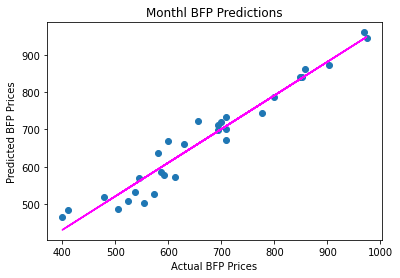

In [3]:
from sklearn.linear_model import Lasso, LinearRegression

# Fit a lasso model on the training set
model = Lasso().fit(X_train.reshape(-1, 1), y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test.reshape(-1, 1))
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual BFP Prices')
plt.ylabel('Predicted BFP Prices')
plt.title('Monthl BFP Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Use the Trained Model

In [4]:
#Lets save the model first
import joblib

# Save the model as a pickle file
filename = './bfp-prediction.pkl'
joblib.dump(model, filename)

['./bfp-prediction.pkl']

In [5]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([1680.89]).astype('float64')
print ('Crude Oil in Rands (111.17 x 15.12): {}'.format((X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new.reshape(-1, 1))
print('Prediction: {:.0f} BFP'.format(np.round(result[0])))

Crude Oil in Rands (111.17 x 15.12): 1680.89
Prediction: 1170 BFP


Estimated BFP Increase/Decrease

In [6]:
print('Estimate increment :',(result - data['BFP'].iloc[-1]))

Estimate increment : [69.67703216]
